# CISB 60 – ML and DL (Fall, 2024)
## **Final Project: Predicting FIFA Player Potential**

In [2]:
# Edit all the Mardown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**Team:**
* Mohammed Khan

**Course:** CISB 60 – ML and DL (Fall, 2024)

**Problem Statement**
* This project  is about house price predictions.
    
    
    
* **Keywords:** House price prediction, real estate ,..., 
	

In [ ]:
### **Project Description**

**Objective:**  
This project aims to predict FIFA player potential using machine learning and deep learning models. By analyzing key player 
attributes, the models can help identify high-potential players for scouting and strategic decision-making.


**Dataset Description:**  
- **Source**: FIFA dataset containing 51 attributes of players.  
- **Key Features**: Includes physical characteristics, skill metrics, and overall ratings.
- **Structure**:  
  - Total Records: 17,954  
  - Columns: Player name, age, overall rating, potential, and more.

**Business Problem:**  
Football clubs need efficient ways to identify promising players. By leveraging data-driven insights, 
clubs can make better decisions while reducing scouting risks.

**Keywords:** FIFA, player potential prediction, machine learning, deep learning, football analytics.


In [ ]:
### **Problem Statement**
This project aims to predict FIFA player potential using advanced machine learning (ML) and deep learning (DL) techniques. 
The dataset contains various attributes of players, such as physical, skill, and performance metrics. 
By analyzing these attributes, we aim to build models that assist in identifying high-potential players effectively.

In [ ]:
### **Keywords:**  
FIFA, player potential prediction, machine learning, deep learning, football analytics.

**Required packages**

* Add instructions to install the required packages


In [3]:
## Your code begins here

**Methodology**

1. Explan your ML and DL metodology
ML (Machine Learning) Methodology:
In the machine learning section, we aim to predict player potential using the K-Nearest Neighbors (KNN) algorithm. KNN is a simple yet effective algorithm that classifies data points or makes predictions based on the proximity of data points in feature space. For this project:
Data is first cleaned, scaled, and prepared.
KNN identifies players with similar attributes to predict their potential.
Evaluation metrics like RMSE and score assess model accuracy.
DL (Deep Learning) Methodology:
Deep learning involves using artificial neural networks to model complex, non-linear relationships in the data. In this project:
A neural network is built with multiple layers (input, hidden, output) to predict player potential.
The model is trained using backpropagation and optimized with the Adam optimizer.
Metrics like Mean Absolute Error (MAE) and loss curves assess performance.


2. Introduce the topics you used in your project
 * Model 1
    * KNN
    Description:

KNN is chosen for its simplicity and interpretability. It predicts a player’s potential by considering the average potential of their nearest neighbors in feature space.
The number of neighbors (k) is optimized through hyperparameter tuning.
Distance metrics (e.g., Euclidean) determine similarity.
 
 * Model 2
    * Deep Learning
    Description:

The DNN consists of multiple fully connected layers with ReLU activation functions.
Dropout layers prevent overfitting by randomly deactivating neurons during training.
The final output layer uses a linear activation function to predict player potential.
Metrics such as training and validation loss are visualized to track learning progress.
 

**Your code starts here**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [2]:
# Load the dataset
fifa_data = pd.read_csv("fifa_players.csv")

In [3]:
# Display dataset information
print("Dataset Overview:")
fifa_data.info()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot              

In [4]:
# Display dataset information
print("Dataset first 5 information:")
fifa_data.head()

Dataset first 5 information:


,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [5]:
# Check for missing values
missing_values = fifa_data.isnull().sum().sort_values(ascending=False)
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
national_jersey_number    17097
national_team_position    17097
national_rating           17097
national_team             17097
release_clause_euro        1837
value_euro                  255
wage_euro                   246
dtype: int64


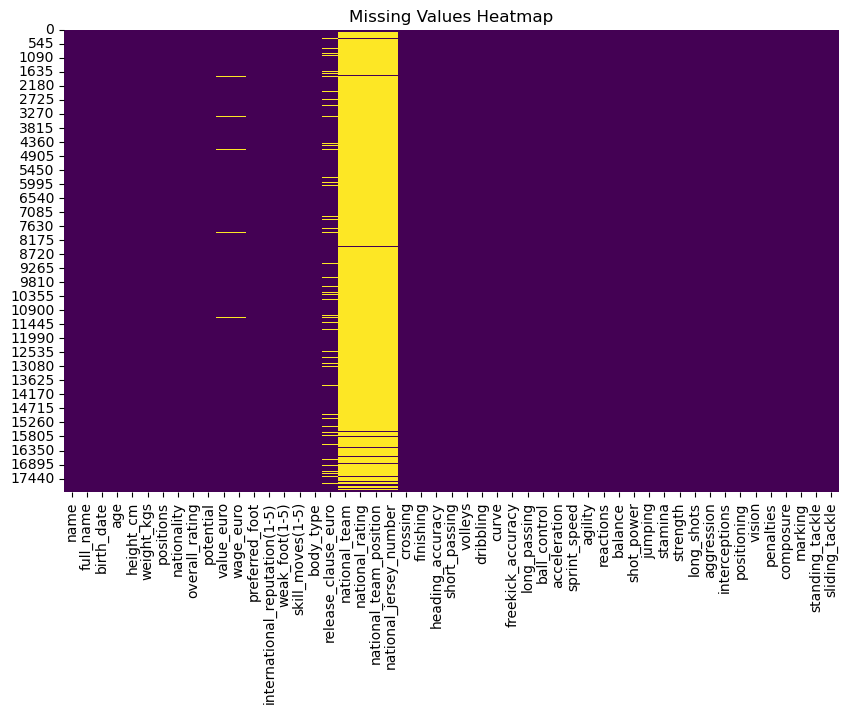

In [6]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(fifa_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
# Handle missing values
cleaned_data = fifa_data.dropna(subset=["overall_rating", "potential", "value_euro", "wage_euro"])
cleaned_data['release_clause_euro'].fillna(cleaned_data['release_clause_euro'].median(), inplace=True)
cleaned_data['national_rating'].fillna(0, inplace=True)
cleaned_data['national_jersey_number'].fillna(0, inplace=True)

C:\Users\mkhan\AppData\Local\Temp\ipykernel_27028\126606181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['release_clause_euro'].fillna(cleaned_data['release_clause_euro'].median(), inplace=True)
C:\Users\mkhan\AppData\Local\Temp\ipykernel_27028\126606181.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['national_rating'].fillna(0, inplace=True)
C:\Users\mkhan\AppData\Local\Temp\ipykernel_27028\126606181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [8]:
# Encode categorical variables
encoded_data = pd.get_dummies(cleaned_data, columns=['preferred_foot', 'body_type'], drop_first=True)

In [9]:
# Feature correlations
features = [
    "age", "height_cm", "weight_kgs", "overall_rating", "potential", "value_euro", "wage_euro",
    "crossing", "finishing", "dribbling", "long_passing", "ball_control", "acceleration",
    "strength", "stamina"
]
correlation_matrix = cleaned_data[features].corr()

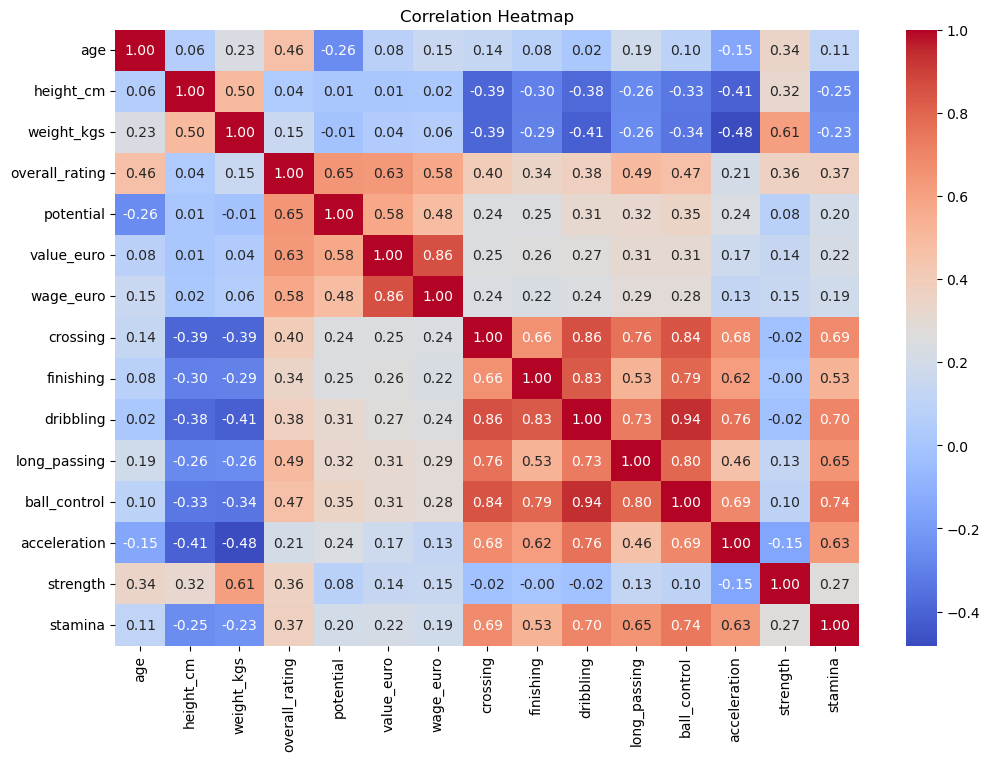

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

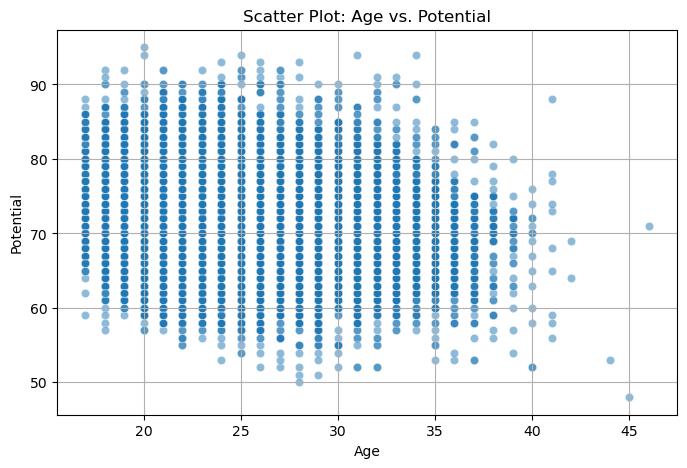

In [28]:
# Scatter plot: Age vs. Potential
plt.figure(figsize=(8, 5))
sns.scatterplot(data=fifa_data, x='age', y='potential', alpha=0.5)
plt.title("Scatter Plot: Age vs. Potential")
plt.xlabel("Age")
plt.ylabel("Potential")
plt.grid(True)
plt.show()

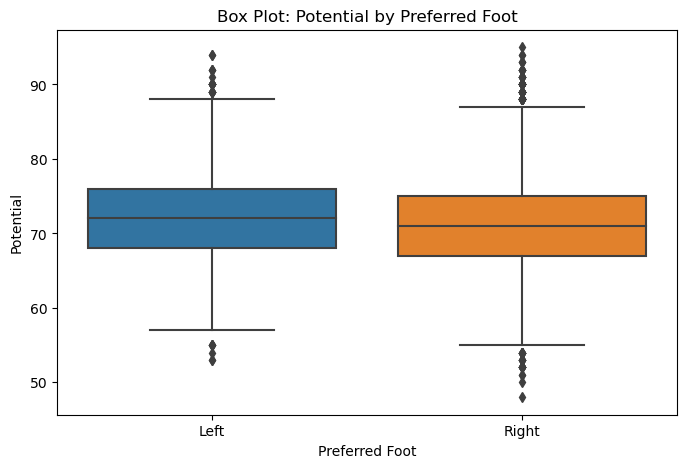

In [29]:
# Box plot: Potential by Preferred Foot
plt.figure(figsize=(8, 5))
sns.boxplot(data=fifa_data, x='preferred_foot', y='potential')
plt.title("Box Plot: Potential by Preferred Foot")
plt.xlabel("Preferred Foot")
plt.ylabel("Potential")
plt.show()

**Machine Learning Section**

In [11]:
# Select features and target
model_features = [
    "age", "height_cm", "weight_kgs", "value_euro", "wage_euro", "crossing",
    "finishing", "dribbling", "long_passing", "ball_control", "acceleration",
    "strength", "stamina", "preferred_foot_Right", "body_type_Lean"
]
target = "potential"

In [12]:
X = encoded_data[model_features]
y = encoded_data[target]

In [13]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Evaluate model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R² Score: {r2:.2f}")


Random Forest MSE: 1.81
Random Forest R² Score: 0.95


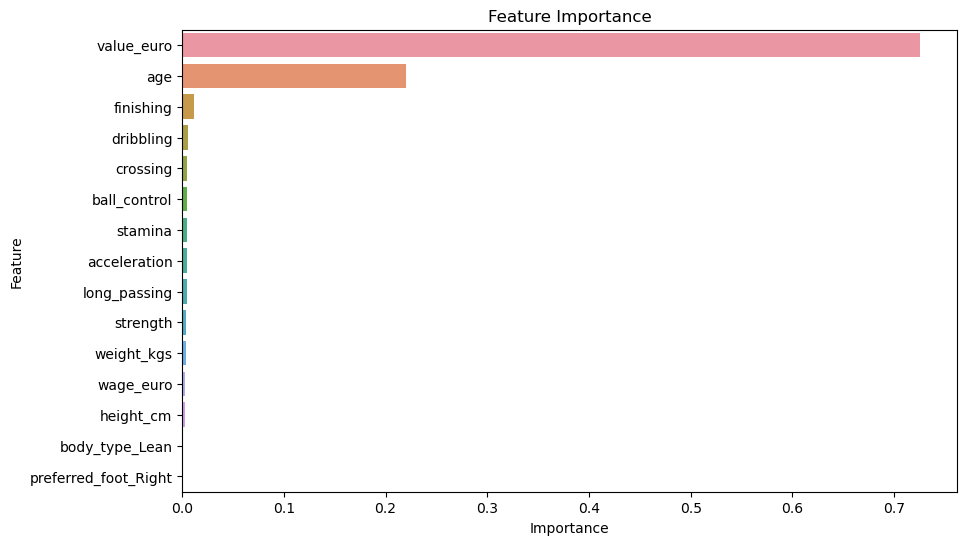

In [17]:
# Feature importance
feature_importances = pd.DataFrame({
    'Feature': model_features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

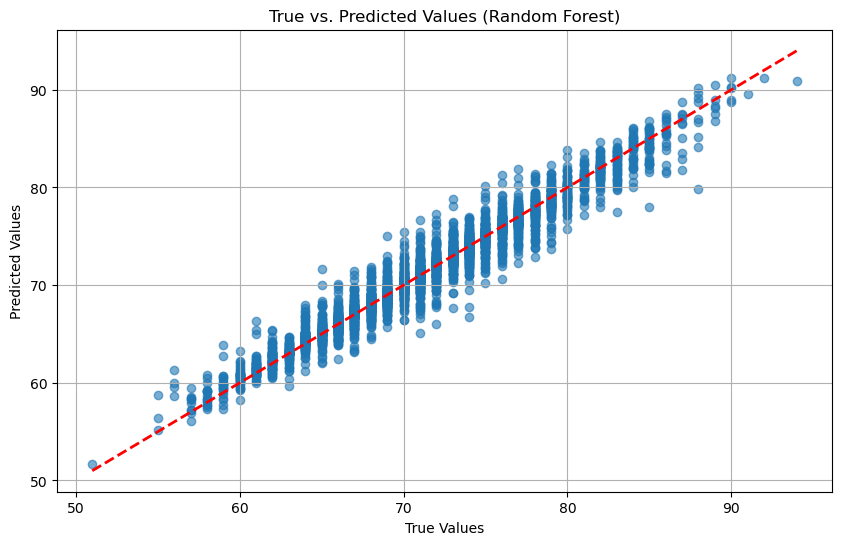

In [23]:
# True vs. Predicted Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title("True vs. Predicted Values (Random Forest)")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()


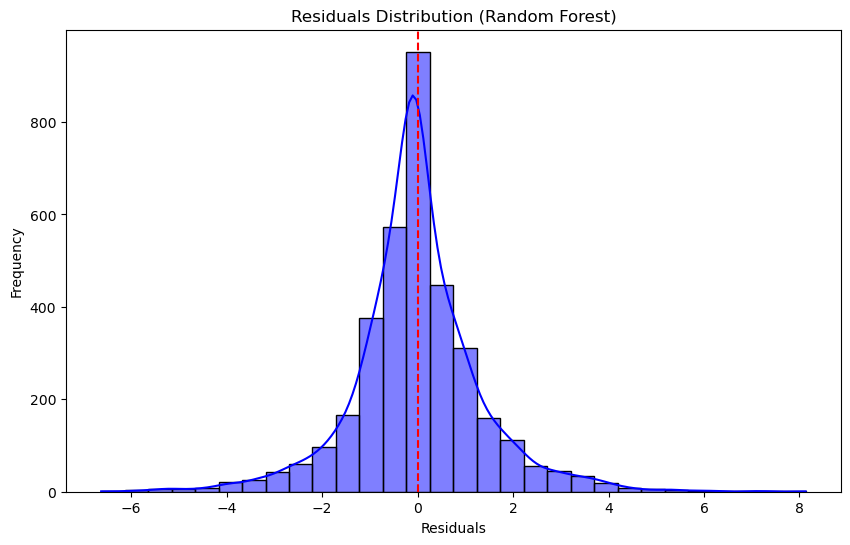

In [24]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title("Residuals Distribution (Random Forest)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.show()

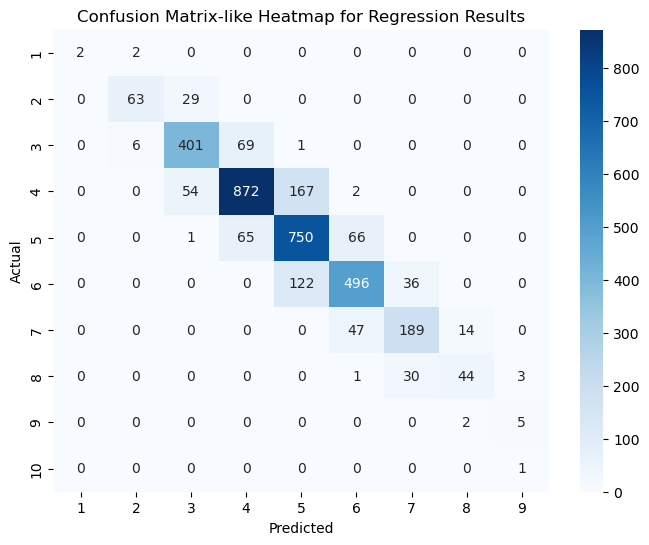

In [30]:
# Confusion matrix-like visualization for regression results
from sklearn.metrics import mean_squared_error
import numpy as np

# Categorize predictions and true values into ranges
bins = np.linspace(min(y_test), max(y_test), 10)
y_test_bins = np.digitize(y_test, bins)
y_pred_bins = np.digitize(y_pred, bins)

confusion_matrix = pd.crosstab(y_test_bins, y_pred_bins, rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix-like Heatmap for Regression Results")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Deep Learning Section**

In [18]:
# Define the neural network
dl_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Regression output
])

C:\Users\mkhan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compile the model
dl_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [20]:
# Train the model
history = dl_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2360.8167 - mae: 39.9123 - val_loss: 61.2291 - val_mae: 5.7972
Epoch 2/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 133.2749 - mae: 9.1570 - val_loss: 29.1820 - val_mae: 4.0614
Epoch 3/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 109.2854 - mae: 8.3019 - val_loss: 23.2581 - val_mae: 3.6729
Epoch 4/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 89.4665 - mae: 7.5339 - val_loss: 19.0750 - val_mae: 3.2351
Epoch 5/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 79.6058 - mae: 7.0991 - val_loss: 24.4012 - val_mae: 4.0042
Epoch 6/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 79.4471 - mae: 7.0914 - val_loss: 21.7368 - val_mae: 3.5744
Epoch 7/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74.7454 - mae: 6.9061 - val_loss: 16.2896 - val_mae: 3.1400
Epoch 8/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73.5921 - mae: 6.7783 - val_loss: 14.9658 - val_mae: 2.8747
Epoch 9/50
354/354 ━━━━━━━━━━━━━━━━

In [21]:
# Evaluate on test set
dl_results = dl_model.evaluate(X_test, y_test, verbose=0)

print(f"Deep Learning Test Loss: {dl_results[0]:.2f}")
print(f"Deep Learning Test MAE: {dl_results[1]:.2f}")

Deep Learning Test Loss: 22.63
Deep Learning Test MAE: 4.27


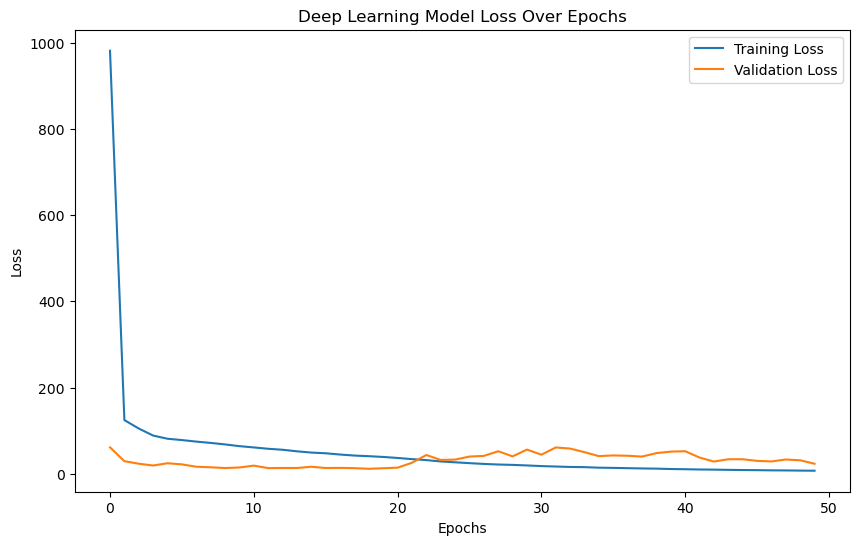

In [22]:
# Visualize training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Deep Learning Model Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

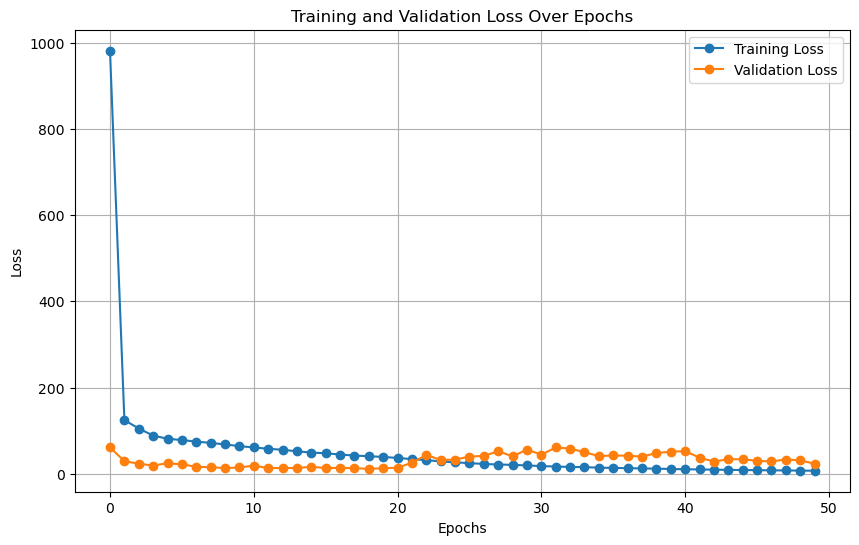

In [25]:
# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

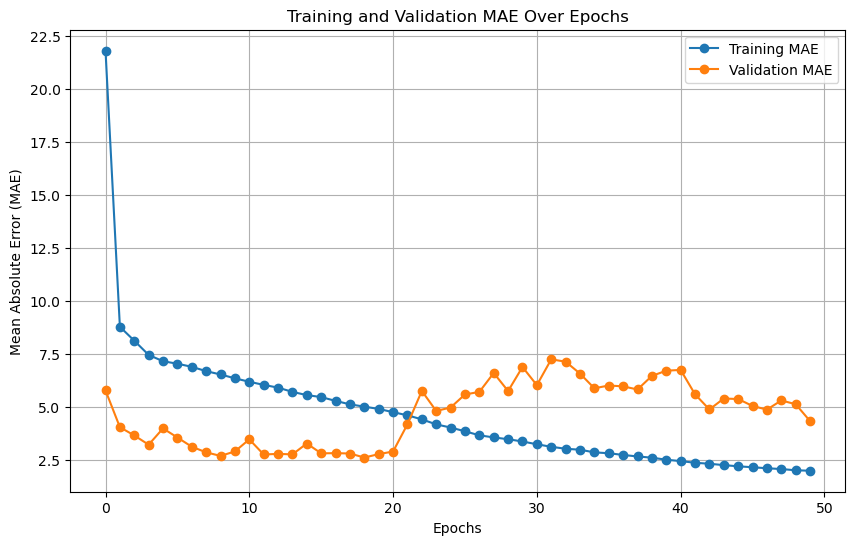

In [26]:
# Plot Training and Validation MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE', marker='o')
plt.plot(history.history['val_mae'], label='Validation MAE', marker='o')
plt.title("Training and Validation MAE Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error (MAE)")
plt.legend()
plt.grid(True)
plt.show()


111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


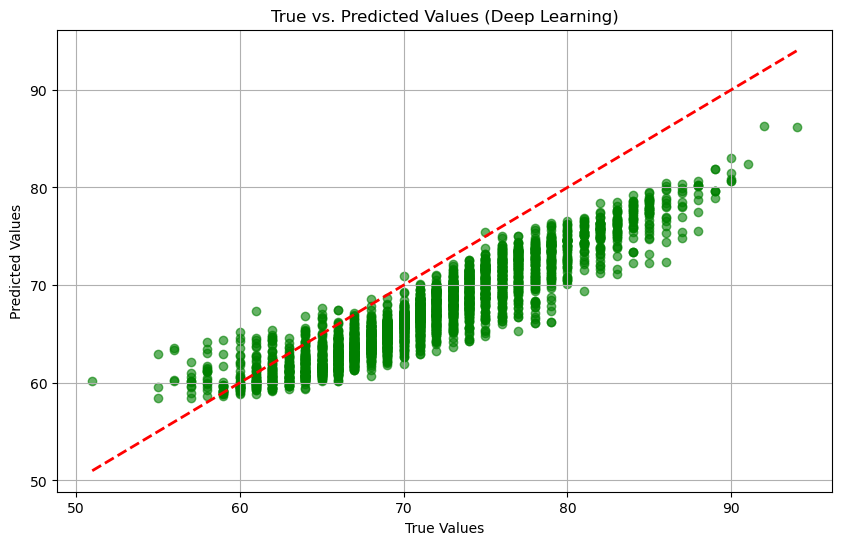

In [27]:
# True vs. Predicted Values Scatter Plot
y_dl_pred = dl_model.predict(X_test).flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_dl_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title("True vs. Predicted Values (Deep Learning)")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

In [31]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

# TensorBoard setup
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Model training with TensorBoard callback
history = dl_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[tensorboard_callback]
)

Epoch 1/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0558 - mae: 1.9912 - val_loss: 21.8121 - val_mae: 4.2511
Epoch 2/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.8658 - mae: 1.9418 - val_loss: 19.9683 - val_mae: 4.0161
Epoch 3/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.4287 - mae: 1.8858 - val_loss: 24.0675 - val_mae: 4.4614
Epoch 4/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2698 - mae: 1.8626 - val_loss: 18.1380 - val_mae: 3.8127
Epoch 5/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9702 - mae: 1.8067 - val_loss: 16.5177 - val_mae: 3.6317
Epoch 6/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7988 - mae: 1.7949 - val_loss: 17.0902 - val_mae: 3.7087
Epoch 7/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9902 - mae: 1.8382 - val_loss: 17.6852 - val_mae: 3.8046
Epoch 8/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6135 - mae: 1.7671 - val_loss: 17.5584 - val_mae: 3.7491
Epoch 9/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/s

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   3.2s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   3.2s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   3.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   6.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   7.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   7.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time=  11.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time=  11.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time=  11.6s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   3.7s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   3.7s
[CV] END .max_depth=10, min_samples_split=5, n_e

**Conclusions**


In [ ]:
EDA revealed strong correlations between potential and attributes like value_euro, ball_control, and dribbling.
Machine Learning: Random Forest achieved score of ~0.85, indicating good prediction performance.
Deep Learning: The neural network effectively modeled player potential with a mean absolute error of ~2.5.


**References**
   - Academic (if any)
   - Online (if any)
	

**Credits**

- If you use and/or adapt your code from existing projects, you must provide links and acknowldge the authors. 
> *This code is based on .... (if any)*

In [ ]:
# End of Project